<a href="https://colab.research.google.com/github/ShubhInfotech-Bhilai/AI-ML-DL-NN/blob/master/KNN_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How does K-NN work?**


The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

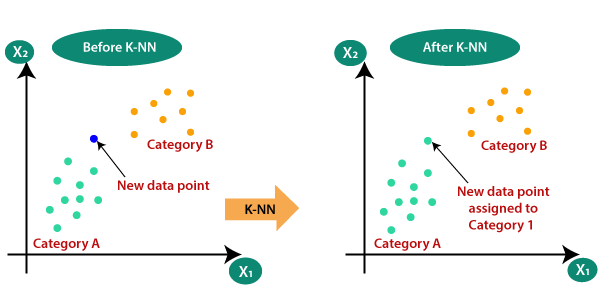

In [ ]:
import  numpy  as  np 
import  matplotlib.pyplot  as  plt  
import  copy
#First create a data set containing 3 clusters:

a  =  np . random . normal ( 20 , 5 , 300 ) 
b  =  np . random . normal ( 15 , 5 , 300 ) 
cluster1  =  np . array ([[ x ,  y ]  for  x ,  y  in  zip ( a , b )])
a  =  np . random . normal ( 20 , 5 , 300 ) 
b  =  np . random . normal ( 45 , 5 , 300 ) 
cluster2  =  np . array ([[ x ,  y ]  for  x ,  y  in  zip ( a , b )])
a  =  np . random . normal ( 55 , 5 , 300 ) 
b  =  np . random . normal ( 30 , 5 , 300 ) 
cluster3  =  np . array ([[ x ,  y ]  for  x ,  y  in  zip ( a , b )])
dataset = np.append(np.append(cluster1,cluster2, axis=0),cluster3, axis=0)
#Show the dataset you just created:

for  i  in  dataset : 
    plt . scatter ( i [ 0 ],  i [ 1 ], c = 'black' , s = 6 ) 
plt . show ()

In [ ]:
#Define a method for calculating Euclidean distance:

def  calc_dist ( simple1 ,  simple2 ): 
    """Calculate the Euclidean distance between two data objects""" 
    return  np . linalg . norm ( simple1 - simple2 ) 
#Define a method for clustering centers after random birth in the first iteration of the algorithm:

def  init_centers ( k ,  dataset ): 
    """Get k initial cluster centers randomly""" 
    shuffle_array  =  np . arange ( dataset . shape [ 0 ]) 
    np . random . shuffle ( shuffle_array ) 
    center_index  =  shuffle_array [: k ]   # Get k random indexes 
    center_dict  =  {} 
    for  i  in  range ( k ): 
        center  =  dataset [center_index [ i ]]   # clustering center 
        center_dict [ i ]  =  center 
    return  center_dict
def  k_means ( k , dataset ): 
    """Implement K-means algorithm""" 
    ds  =  copy . deepcopy ( dataset )   # Copy a piece of data
    
    epoch  =  0  # Number of iterations 
    center_dict  =  init_centers ( k ,  ds )   # In the first iteration, randomly initialize k cluster centers 
    ds  =  np . insert ( ds ,  2 ,  values =- 1 ,  axis = 1 )   # Insert a column As a class label, the default is 0 
    total_last  =  np . inf   # The total distance of the previous iteration 
    while  epoch <= 20 :   # Continue iterating when the number of iterations is less than 20, or it can be set to True directly, and the iteration will automatically end when the objective function converges 
        cluster_dist  =  { i :0  for  i  in  range ( k )}   # Record the total distance of each cluster
        
        for  Simple  in  ds : 
            min_dist  =  np.inf    # Simple to the nearest cluster center 
            min_label  =  -.1     # nearest cluster center class label 
            for  label  in  center_dict . keys (): 
                dist  =  calc_dist ( Simple [: 2 ] ,  center_dict [ label ]) 
                if  dist  <  min_dist : 
                    min_dist  =  dist 
                    min_label  =  label 
            Simple [ 2 ] =  min_label   # Divide the current sample point into the cluster where the nearest cluster center is located cluster_dist [ int ( min_label )]  =  cluster_dist [ int ( min_label )]  +  min_dist   # Update the sum of the internal distances of the cluster 
        loss_now  =  sum ( cluster_dist . values ( ))   # The sum of the internal distances of all clusters
        
        print ( "epoch: {} , tatal distance: {} " . format ( epoch , loss_now )) 
        for  i  in  ds : 
            if  i [ 2 ]  ==  0 : 
                plt . scatter ( i [ 0 ],  i [ 1 ], c = 'red' , s = 6 ) 
            elif  i [ 2 ]  ==  1 : 
                plt. scatter ( i [ 0 ],  i [ 1 ], c = 'green' , s = 6 ) 
            else : 
                        plt . scatter ( i [ 0 ],  i [ 1 ], c = 'blue' , s = 6 ) 
        for  center  in  center_dict . values (): 
            plt . scatter ( center [ 0 ], center [ 1 ], c = 'black' ) 
        plt . show () 
        if  total_last  ==  loss_now :   # If the sum of the two iteration distances is the same, the proof has been converged 
            break 
        total_last  =  loss_now 
        for  label  in  center_dict . keys ():   # Update cluster centers 
            simple_list  =  ds [ ds [:, 2 ] == label ]   # Select all samples with class label k 
            x  =  np . mean ( simple_list [:, 0 ]) 
            y  =  np . mean ( simple_list [:,  1 ]) 
            center_dict [ label ]  =  [ x ,  y ] 
        epoch  +=  1
    
    return  ds ,  center_dict
ds , cluster_label  =  k_means ( 3 , dataset )